Example for collisions with box, but box does not have T, so calculating wet radii based on dry radii is impossible

In [1]:
from matplotlib import pyplot
import numpy as np

In [2]:
from PySDM_examples.Collisions_box.settings import Settings
from PySDM_examples.Collisions_box.simulation import make_core
from PySDM.physics import si
from open_atmos_jupyter_utils import show_plot

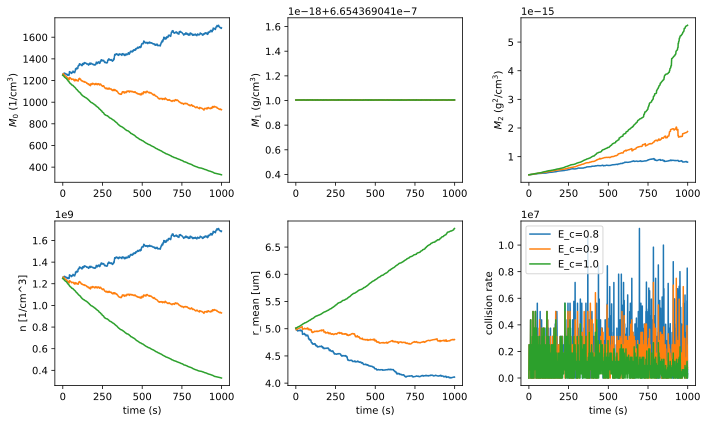

HTML(value="<a href='./fig3.pdf' target='_blank'>./fig3.pdf</a><br>")

In [3]:
settings = Settings()
fig, ax = pyplot.subplots(nrows=2, ncols=3, figsize=(10,6))
for i in range(3):
    coal_eff = settings.coal_effs[i]
    particulator = make_core(settings, coal_eff)
    t = settings.output_steps
    moments = np.zeros((3, len(t)))
    n_part = np.zeros((len(t)))
    r_mean = np.zeros((len(t)))
    collision_rate = np.zeros((len(t)))
    j = 0
    for step in settings.output_steps:
        particulator.run(step - particulator.n_steps)
        moments[:,j] = [particulator.products['M0'].get()[0], particulator.products['M1'].get()[0],particulator.products['M2'].get()[0]]
        n_part[j] = particulator.products['n_part'].get()[0]
        r_mean[j] = 10**6*particulator.products['r_mean'].get()[0]
        collision_rate[j] = particulator.products['collision_rate'].get()[0]
        j += 1 #time index
    moments[1,:] *= settings.rho / si.g
    moments[2,:] *= settings.rho**2 / si.g**2
    moments *= 1/settings.dv*si.cm**3
    ax[0,0].plot(t, moments[0,:])
    ax[0,1].plot(t, moments[1,:])
    ax[0,2].plot(t, moments[2,:])
    ax[1,0].plot(t, n_part)
    ax[1,1].plot(t, r_mean)
    ax[1,2].plot(t, collision_rate)
ax[1,0].set_xlabel('time (s)')
ax[1,1].set_xlabel('time (s)')
ax[1,2].set_xlabel('time (s)')
ax[0,0].set_ylabel('$M_0$ (1/cm$^3$)')
ax[0,1].set_ylabel('$M_1$ (g/cm$^3$)')
ax[0,2].set_ylabel('$M_2$ (g$^2$/cm$^3$)')
ax[1,0].set_ylabel('n [1/cm^3]')
ax[1,1].set_ylabel('r_mean [um]')
ax[1,2].set_ylabel('collision rate')

pyplot.legend(['E_c=0.8','E_c=0.9','E_c=1.0'])
pyplot.tight_layout()
show_plot('fig3.pdf')
